<a href="https://colab.research.google.com/github/Taralimz/Logistic-Regression-predict-trading/blob/main/Starbuck__Stock_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz

!tar -xzvf ta-lib-0.4.0-src.tar.gz

%cd ta-lib

!./configure --prefix=/usr

!make

!make install

--2023-09-22 12:58:39--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-09-22 12:58:40--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://netactuate.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-09-22 12:58:40--  http://netactuate.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving netactuat

In [ ]:
!pip install pandas
!pip install numpy
!pip install requests
!pip install lxml
!pip install yfinance
!pip install talib
!pip install numpy
!pip install ta-lib

ERROR: Could not find a version that satisfies the requirement talib (from versions: none)
ERROR: No matching distribution found for talib
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.1/357.1 kB 7.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ta-lib: filename=TA_Lib-0.4.28-cp310-cp310-linux_x86_64.whl size=2017494 sha256=8a0290ad20b36415d58a5ca2d7509cd67cb140b7bb1eae425e85fb292dfad3aa
  Stored in directory: /root/.cache/pip/wheels/66/54/9d/10bfd00931c0c993f373269d350635df520b5064e5290a9d94
Successfully built ta-lib


In [ ]:
# Data Manipulation
import numpy as np
import pandas as pd

# Technical Indicators
import talib as ta

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Data fetching
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [ ]:
df = pdr.get_data_yahoo('SBUX', '2000-01-01', '2023-09-01')
df = df.dropna()
df = df.iloc[:,:4]
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close
Date,,,,
2000-01-03,2.984375,3.085938,2.906250,3.082031
2000-01-04,3.007813,3.109375,2.968750,2.984375
2000-01-05,2.992188,3.078125,2.960938,3.023438
2000-01-06,3.000000,3.203125,3.000000,3.132813
2000-01-07,3.093750,3.125000,3.031250,3.117188


In [ ]:
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()
X = df.iloc[:,:9]

In [ ]:
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)

In [ ]:
split = int(0.7*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [ ]:
model = LogisticRegression()
model = model.fit (X_train,y_train)

In [ ]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open,[0.16408311799736838]
1,High,[-0.04723960006235359]
2,Low,[-0.1058454096202223]
3,Close,[-0.2011238006751571]
4,S_10,[0.1921989963644149]
5,Corr,[-0.006991289070031239]
6,RSI,[0.0016417591718310381]
7,Open-Close,[0.006231706136424966]
8,Open-Open,[-0.034091188482755136]


In [ ]:
probability = model.predict_proba(X_test)
print(probability)

[[0.37752271 0.62247729]
 [0.42021264 0.57978736]
 [0.39493174 0.60506826]
 ...
 [0.61245193 0.38754807]
 [0.59961643 0.40038357]
 [0.44700876 0.55299124]]


In [ ]:
probability = model.predict_proba(X_test)
print(probability)

predicted = model.predict(X_test)

[[0.37752271 0.62247729]
 [0.42021264 0.57978736]
 [0.39493174 0.60506826]
 ...
 [0.61245193 0.38754807]
 [0.59961643 0.40038357]
 [0.44700876 0.55299124]]


In [ ]:
print(metrics.confusion_matrix(y_test, predicted))

[[328 533]
 [351 569]]


In [ ]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.48      0.38      0.43       861
           1       0.52      0.62      0.56       920

    accuracy                           0.50      1781
   macro avg       0.50      0.50      0.49      1781
weighted avg       0.50      0.50      0.50      1781



In [ ]:
print(model.score(X_test,y_test))

0.5036496350364964


In [ ]:
cross_val = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())

[0.51851852 0.5016835  0.49326599 0.42592593 0.53367003 0.52356902
 0.5311973  0.44350759 0.49241147 0.49409781]
0.495784716189438


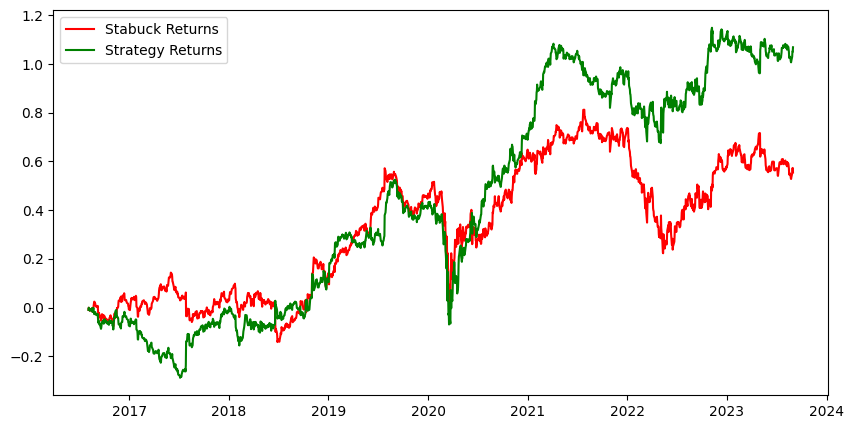

In [ ]:
df['Predicted_Signal'] = model.predict(X)
df['Stabuck_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_Nifty_returns = np.cumsum(df[split:]['Stabuck_returns'])

df['Startegy_returns'] = df['Stabuck_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Startegy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Nifty_returns, color='r',label = 'Stabuck Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()